## Classification

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings

from sklearn.datasets import *
import statsmodels.formula.api as smf


In [3]:
# Settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

#Seaborn
sns.set_style("darkgrid")
plt.matplotlib.style.use('default')
%matplotlib inline

my_colors = ["windows blue", "saffron", "hot pink", "algae green", "dusty purple", 
             "greyish", "petrol", "denim blue", "lime"]

sns.set_palette(sns.xkcd_palette(my_colors))
colors = sns.xkcd_palette(my_colors)

#Warnings
warnings.filterwarnings("ignore")

In [4]:
# summary function
def my_df_summary(data):
    '''summary function'''
    try:
        dat = data.copy()
        df = pd.DataFrame([dat.min(), dat.max(), dat.mean(), dat.std(), dat.isna().sum(), dat.nunique(), dat.dtypes],
                     index=['Minimum', 'Maximum', 'Mean', 'Stand. Abw.','#NA', '#Uniques', 'dtypes'])        
        return df
    except:
        print('No Summary.')
        return data

### Daten laden

In [5]:
#dataset = load_iris()
dataset = load_wine()

print(dataset.DESCR)

df = pd.DataFrame(data= np.c_[dataset['data'], dataset['target']], columns= dataset['feature_names'] + ['target'])
df.target = df.target.astype(int)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

### Explorative Datenanalyse

In [6]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [7]:
df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


In [8]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [10]:
my_df_summary(df)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
Minimum,11.03,0.74,1.36,10.6,70,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278,0
Maximum,14.83,5.8,3.23,30,162,3.88,5.08,0.66,3.58,13,1.71,4,1680,2
Mean,13.0006,2.33635,2.36652,19.4949,99.7416,2.29511,2.02927,0.361854,1.5909,5.05809,0.957449,2.61169,746.893,0.938202
Stand. Abw.,0.811827,1.11715,0.274344,3.33956,14.2825,0.625851,0.998859,0.124453,0.572359,2.31829,0.228572,0.70999,314.907,0.775035
#NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
#Uniques,126,133,79,63,53,97,132,39,101,132,78,122,121,3
dtypes,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64


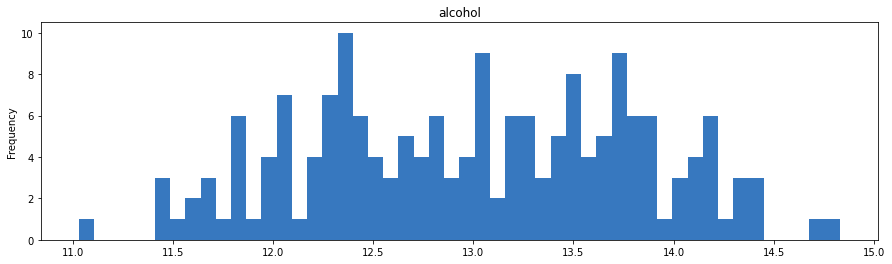

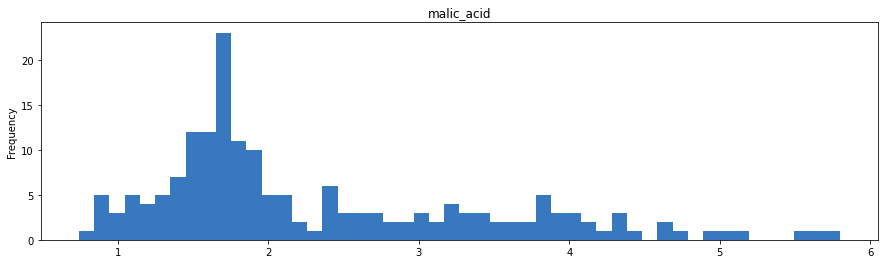

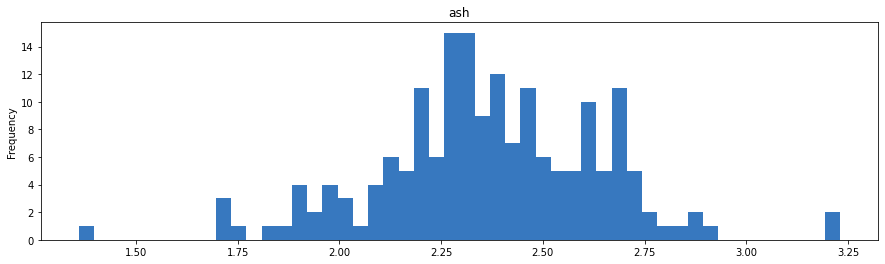

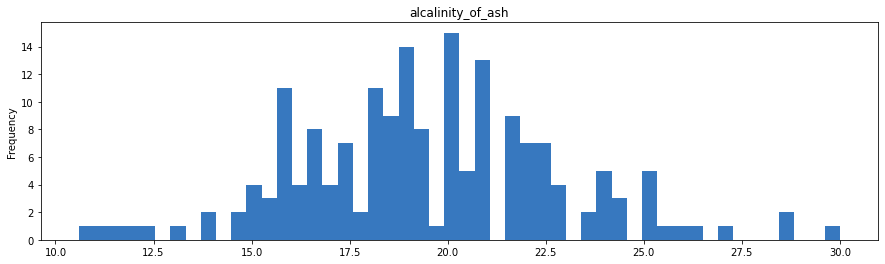

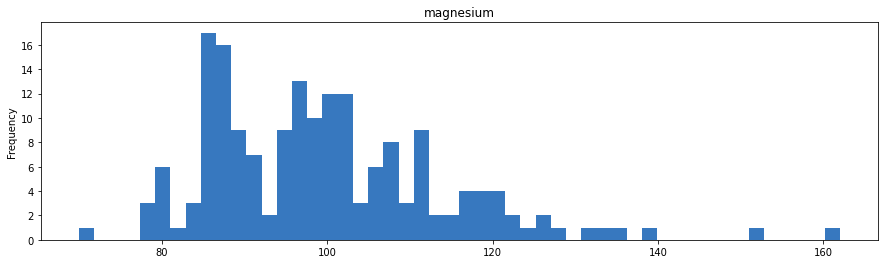

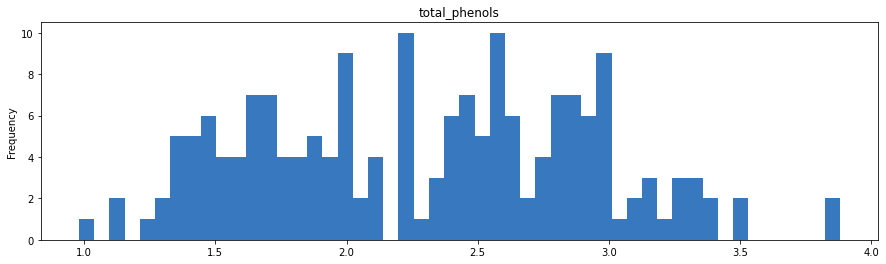

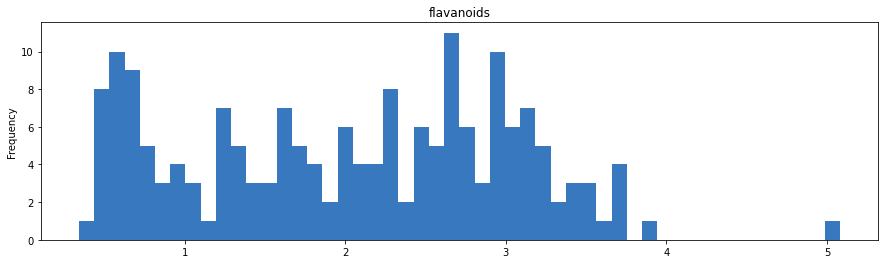

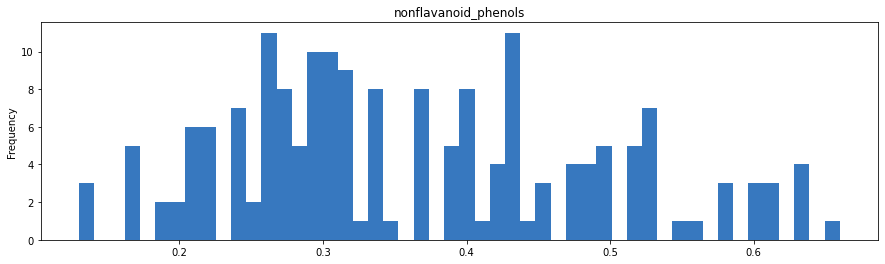

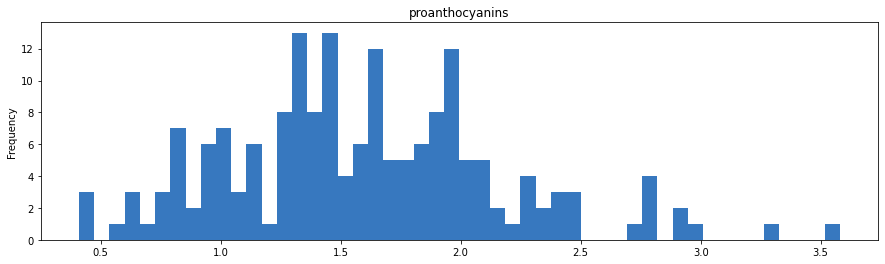

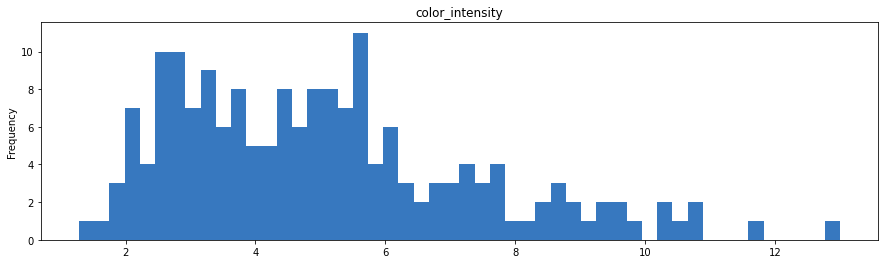

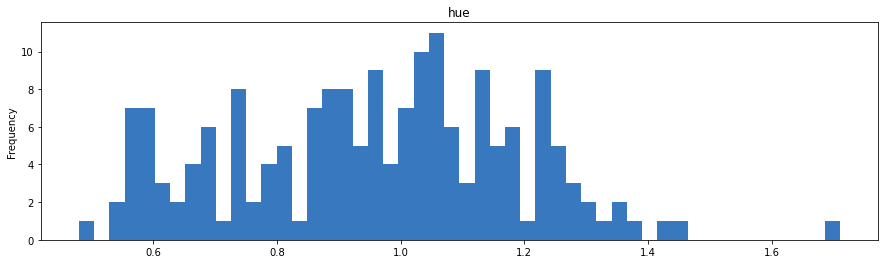

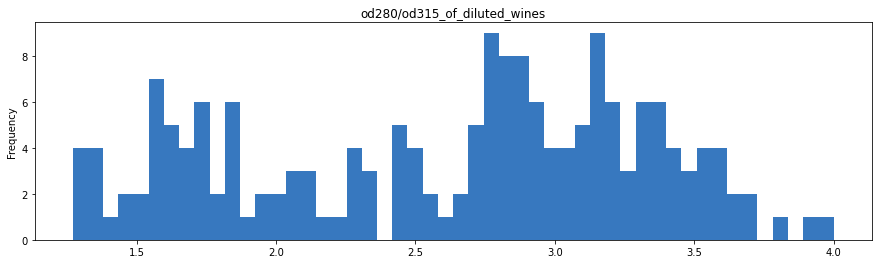

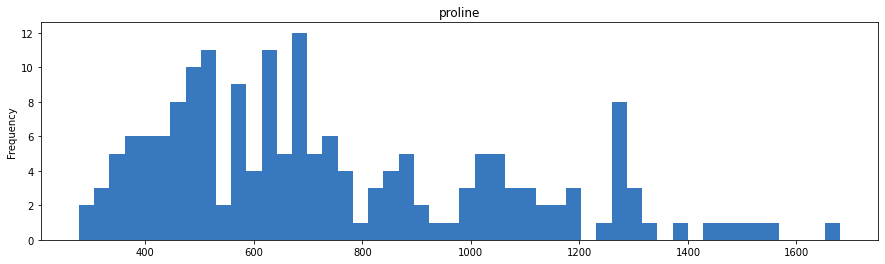

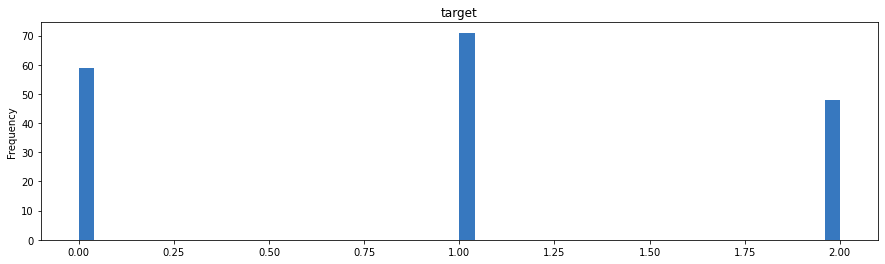

In [11]:
df.columns
l=list(df.columns)
for i in range(len(l)):
    fig = df.iloc[:,i].plot(kind='hist', bins=50, figsize=(15,4))
    plt.title(df.columns[i])
    plt.show()    

### Correlation

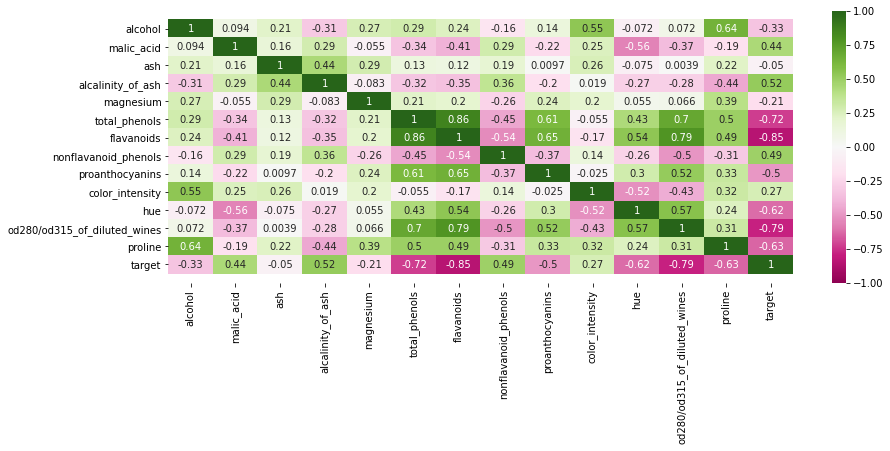

In [12]:
plt.figure(figsize=(14,5))
sns.heatmap(df.corr(), vmin=-1,cmap='PiYG', annot=True);
plt.yticks(rotation=0)

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.show()

In [13]:
# Which variables have a particularly correlation with the target size?
df.corr().iloc[0:(len(df.columns)-1),-1].abs().sort_values(ascending=False)

flavanoids                      0.847498
od280/od315_of_diluted_wines    0.788230
total_phenols                   0.719163
proline                         0.633717
hue                             0.617369
alcalinity_of_ash               0.517859
proanthocyanins                 0.499130
nonflavanoid_phenols            0.489109
malic_acid                      0.437776
alcohol                         0.328222
color_intensity                 0.265668
magnesium                       0.209179
ash                             0.049643
Name: target, dtype: float64

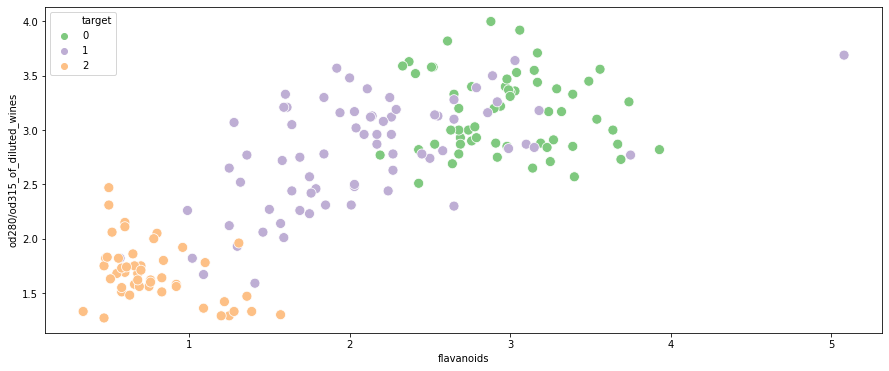

In [14]:
imp = df.corr().iloc[0:(len(df.columns)-1),-1].abs().sort_values(ascending=False)
limp = list(imp.index[0:2].values)

plt.figure(figsize=(15,6))
fig = sns.scatterplot(x=limp[0], y=limp[1], hue='target', data=df, palette='Accent', s=100)
plt.show()

### Classification Methods

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
i_split = 0.30
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:df.shape[1]-1], df.iloc[:,-1], test_size=i_split, random_state=1234)

In [18]:
len(X_test)

54

### Support Vector Machines

In [19]:
from sklearn.svm import SVC

In [20]:
model = SVC()

In [21]:
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
#model_svm = model

In [22]:
predictions = model.predict(X_test)

In [23]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1])

### How do I find out how well a classification worked?

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
df_conf_matrix = confusion_matrix(y_test,predictions)

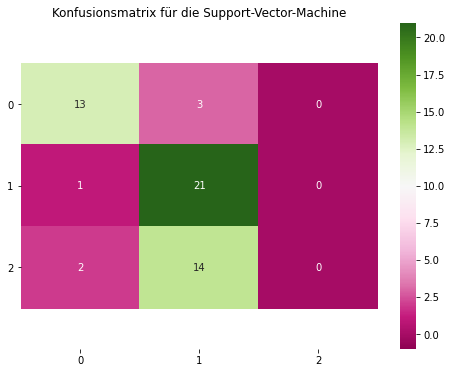

In [26]:
plt.figure(figsize = (8,6))
sns.heatmap(df_conf_matrix, vmin=-1, cmap='PiYG', annot=True)
plt.title('Konfusionsmatrix für die Support-Vector-Machine')
plt.yticks(rotation=0)

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.55      0.95      0.70        22
           2       0.00      0.00      0.00        16

    accuracy                           0.63        54
   macro avg       0.46      0.59      0.50        54
weighted avg       0.47      0.63      0.53        54



### Naive Bayes Classification

In [28]:
from sklearn.naive_bayes import GaussianNB

In [29]:
model = GaussianNB()

In [31]:
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [32]:
model_nb = model

In [33]:
predictions = model.predict(X_test)

In [34]:
predictions

array([1, 1, 1, 1, 2, 1, 2, 0, 0, 2, 2, 2, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1,
       1, 2, 1, 2, 1, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0, 2, 0, 0, 2, 0, 1, 2,
       1, 1, 0, 2, 1, 2, 0, 2, 2, 1])

In [35]:
df_conf_matrix = confusion_matrix(y_test, predictions)

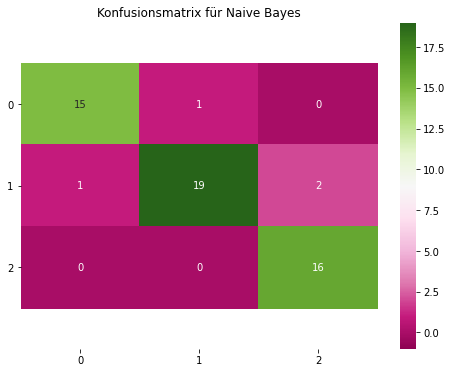

In [36]:
plt.figure(figsize = (8,6))
sns.heatmap(df_conf_matrix, vmin=-1, cmap='PiYG', annot=True)
plt.title('Konfusionsmatrix für Naive Bayes')
plt.yticks(rotation=0)

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.95      0.86      0.90        22
           2       0.89      1.00      0.94        16

    accuracy                           0.93        54
   macro avg       0.93      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54



### But: Frequency-based models are susceptible to unevenly distributed target variables

In [39]:
from imblearn.under_sampling import RandomUnderSampler

In [40]:
rus = RandomUnderSampler(random_state=0)

In [41]:
X = df.iloc[:,0:df.shape[1]-1].copy()
y = df.iloc[:,-1].copy()
X_resampled, y_resampled = rus.fit_sample(X, y)

X = pd.DataFrame(X_resampled, columns=X.columns)
y = pd.Series(y_resampled)

df = X.copy()
df['target']=y.copy()

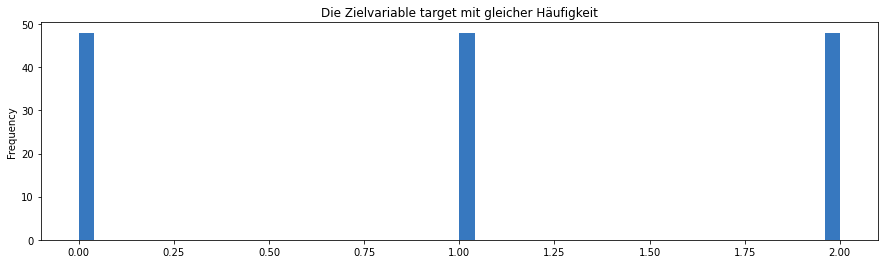

In [42]:
fig = df.iloc[:,-1].plot(kind='hist', bins=50, figsize=(15,4))
plt.title('Die Zielvariable {} mit gleicher Häufigkeit'.format(df.columns[-1]))
plt.show() 

In [43]:
i_split = 0.30
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:df.shape[1]-1], df.iloc[:,-1], test_size=i_split, random_state=1234)

In [44]:
len(X_test)

44

In [45]:
model = GaussianNB()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [46]:
df_conf_matrix = confusion_matrix(y_test, predictions)

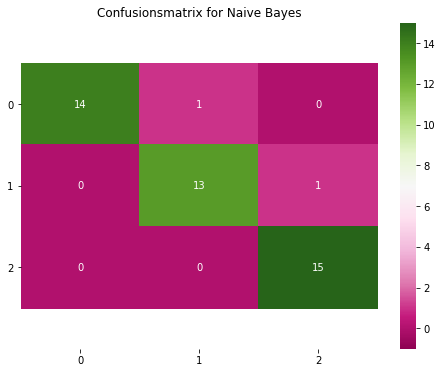

In [47]:
plt.figure(figsize = (8,6))
sns.heatmap(df_conf_matrix, vmin=-1, cmap='PiYG', annot=True)
plt.title('Confusionsmatrix for Naive Bayes')
plt.yticks(rotation=0)

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [48]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.93      0.93      0.93        14
           2       0.94      1.00      0.97        15

    accuracy                           0.95        44
   macro avg       0.96      0.95      0.95        44
weighted avg       0.96      0.95      0.95        44



### Decision Trees

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
model = DecisionTreeClassifier(criterion='gini',max_depth=None)

In [51]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [55]:
model_dt = model

In [56]:
predictions = model.predict(X_test)

In [57]:
df_conf_matrix = confusion_matrix(y_test,predictions)

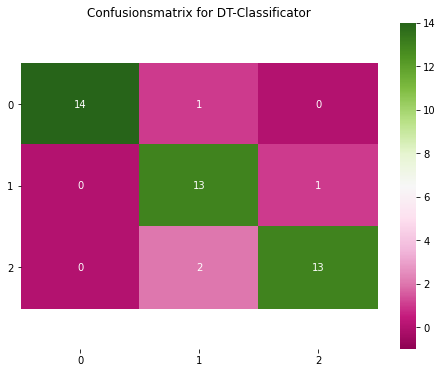

In [58]:
plt.figure(figsize = (8,6))
sns.heatmap(df_conf_matrix, vmin=-1, cmap='PiYG', annot=True)
plt.title('Confusionsmatrix for DT-Classificator')
plt.yticks(rotation=0)

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [59]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.81      0.93      0.87        14
           2       0.93      0.87      0.90        15

    accuracy                           0.91        44
   macro avg       0.91      0.91      0.91        44
weighted avg       0.92      0.91      0.91        44



In [60]:
model.feature_importances_

array([0.030003  , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0802783 , 0.        , 0.        , 0.42768159,
       0.        , 0.02909382, 0.43294329])